In [1]:
import cv2
import numpy as np
import math
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

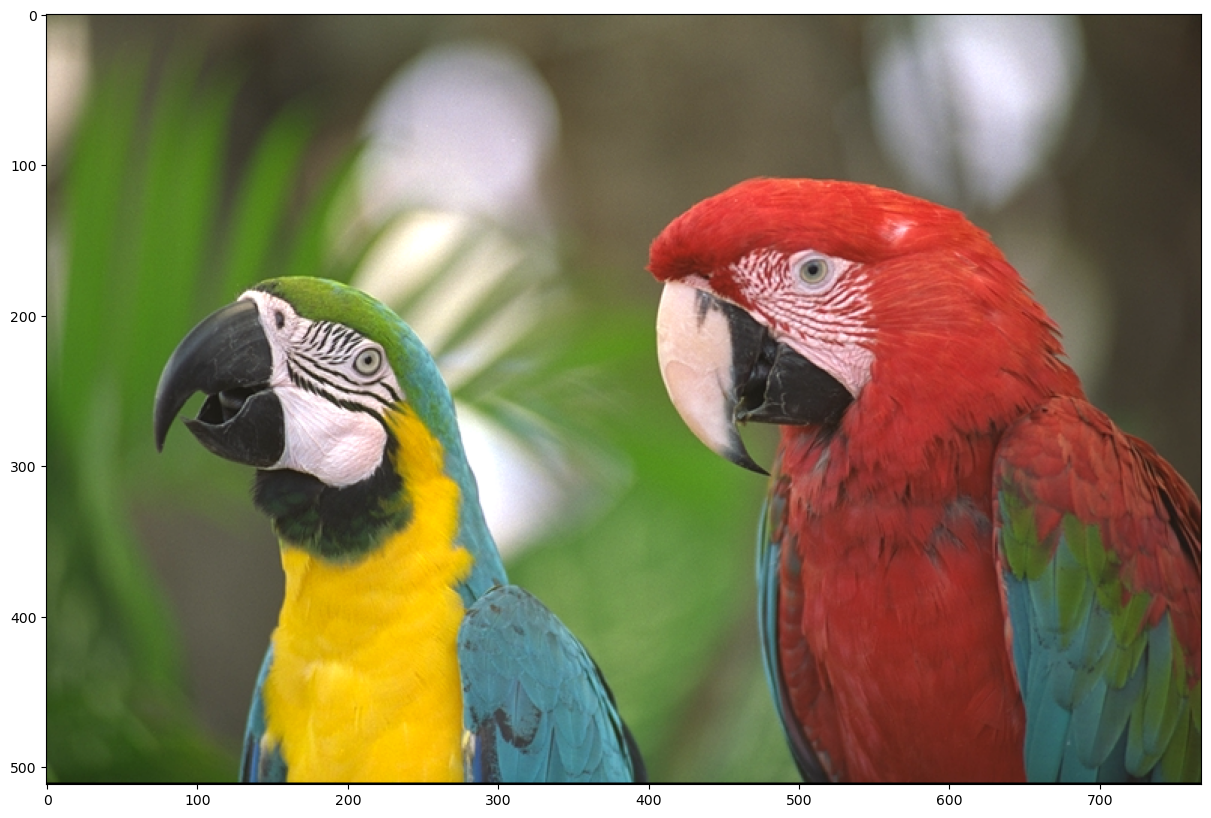

In [2]:
img = cv2.imread('data/kodim23.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [4]:
colors = np.array([[0, 0, 0],
                   [64, 64, 64],
                   [192, 192, 192],
                   [255, 255, 255]])
img = img.astype(np.float32)
quantized = np.zeros_like(img)
rows, cols, channels = img.shape
distance = [0,0,0,0]
for r in range(rows):
    for c in range(cols):
        pixel = img[r,c,:]
        for i in range(4):
            distance[i] = math.sqrt((pixel[0]-colors[i,0])**2+(pixel[1]-colors[i,1])**2+(pixel[2]-colors[i,2])**2)
        min_index = distance.index(min(distance))
        new_pixel =  colors[min_index]   
        quantized[r, c, :] = new_pixel
quantized = quantized.astype(np.uint8)        

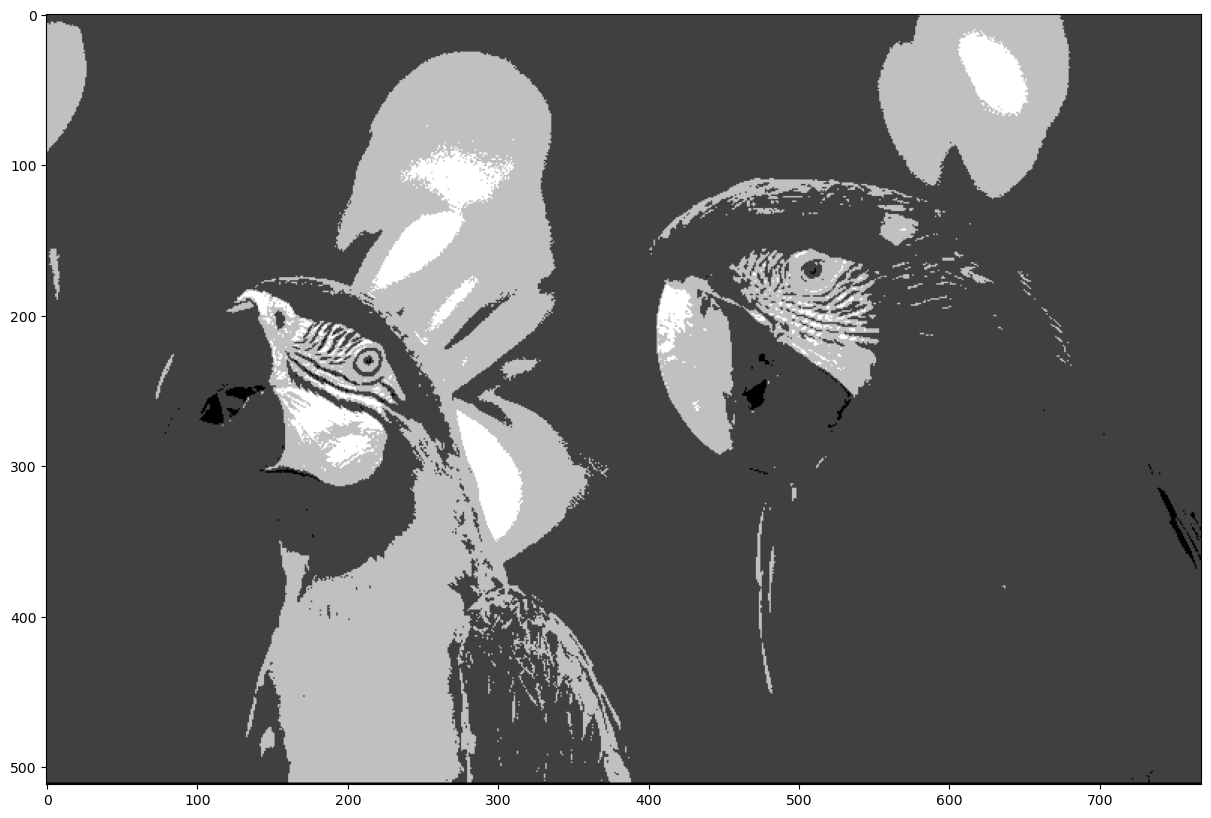

In [6]:
plt.imshow(quantized)

In [7]:
diff = img - quantized
avg_quant_error = np.mean(diff)
print('error = ',avg_quant_error)

error =  9.172205


In [8]:
img_tmp = np.copy(img)
dithering = np.zeros_like(img)

In [9]:
for r in range(1, rows-1):
    for c in range(1, cols-1):
        pixel = img_tmp[r,c,:]
        for i in range(4):
            distance[i] = math.sqrt((pixel[0]-colors[i,0])**2+(pixel[1]-colors[i,1])**2+(pixel[2]-colors[i,2])**2)
        min_index = distance.index(min(distance))
        new_pixel =  colors[min_index]
        error = pixel - new_pixel
        img_tmp[r, c+1] += error*7/16
        img_tmp[r+1, c-1] += error*3/16
        img_tmp[r+1, c] += error*5/16
        img_tmp[r+1, c+1] += error*1/16
        dithering[r, c, :] = new_pixel
dithering = dithering.astype(np.uint8)        

(<Axes: >, <matplotlib.image.AxesImage at 0x7f0105c4a890>)

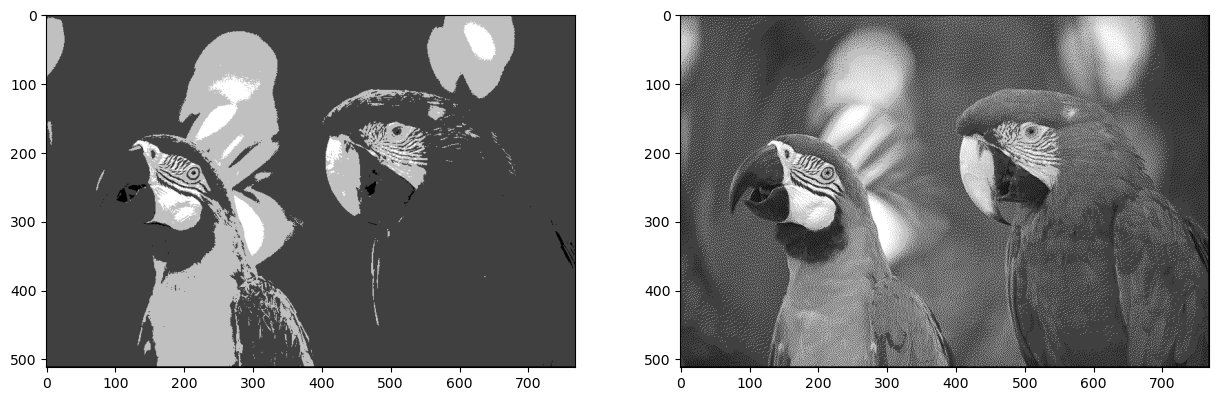

In [11]:
plt.subplot(121), plt.imshow( quantized)  
plt.subplot(122), plt.imshow(dithering)   


In [17]:
diff = img - dithering
avg_quant_error = np.mean(diff)
print('error = ',avg_quant_error)

error =  0.3676597


In [19]:
colors = np.array([[0, 0, 0],
                   [255, 255, 255]])
quantized = np.zeros_like(img)
rows, cols, channels = img.shape
distance = [0,0]
for r in range(rows):
    for c in range(cols):
        pixel = img[r,c,:]
        for i in range(2):
            distance[i] = math.sqrt((pixel[0]-colors[i,0])**2+(pixel[1]-colors[i,1])**2+(pixel[2]-colors[i,2])**2)
        min_index = distance.index(min(distance))
        new_pixel =  colors[min_index]   
        quantized[r, c, :] = new_pixel
quantized = quantized.astype(np.uint8)  

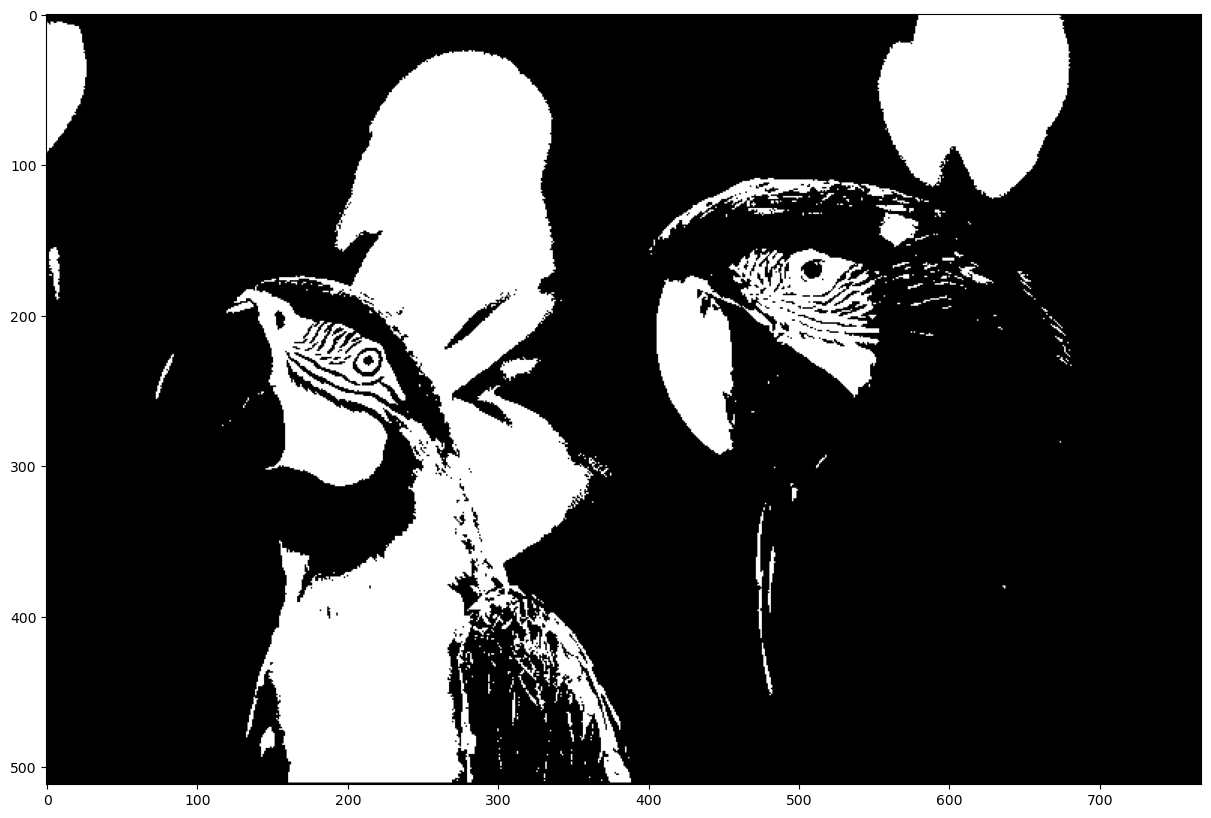

In [21]:
plt.imshow(quantized)

In [23]:
diff = img - quantized
avg_quant_error = np.mean(diff)
print('error = ',avg_quant_error)

error =  46.292534


In [25]:
colors = np.array([[0, 0, 0],
                   [255, 255, 255]])
img_tmp = np.copy(img)
dithering = np.zeros_like(img)


In [27]:
distance = [0,0]
for r in range(1, rows-1):
    for c in range(1, cols-1):
        pixel = img_tmp[r,c,:]
        for i in range(2):
            distance[i] = math.sqrt((pixel[0]-colors[i,0])**2+(pixel[1]-colors[i,1])**2+(pixel[2]-colors[i,2])**2)
        min_index = distance.index(min(distance))
        new_pixel =  colors[min_index]
        error = pixel - new_pixel
        img_tmp[r, c+1] += error*7/16
        img_tmp[r+1, c-1] += error*3/16
        img_tmp[r+1, c] += error*5/16
        img_tmp[r+1, c+1] += error*1/16
        dithering[r, c, :] = new_pixel
dithering = dithering.astype(np.uint8) 

(<Axes: >, <matplotlib.image.AxesImage at 0x7f01059eba50>)

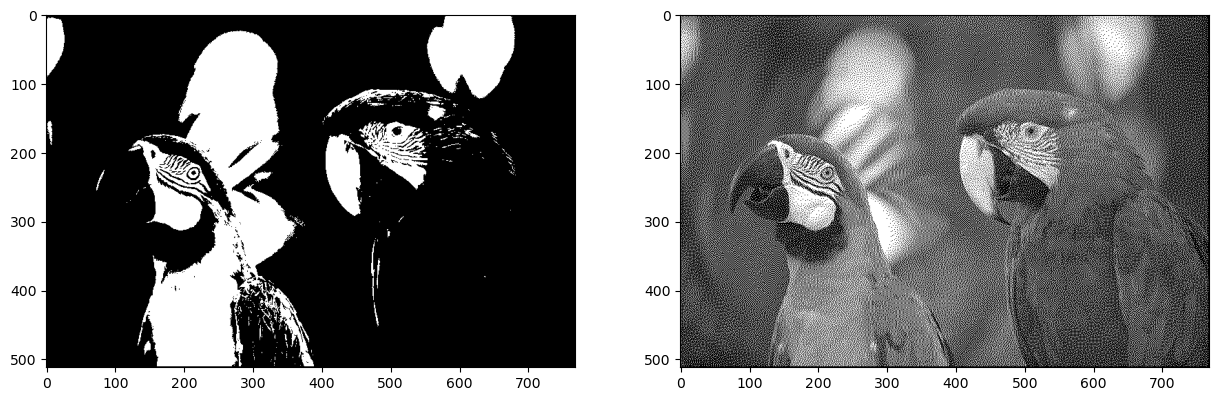

In [28]:
plt.subplot(121), plt.imshow( quantized)  
plt.subplot(122), plt.imshow(dithering)   


In [31]:
diff = img - dithering
avg_quant_error = np.mean(diff)
print('error = ',avg_quant_error)

error =  0.43720415


In [33]:
#результат очевиден dithering побеждает!

In [47]:
from sklearn.cluster import KMeans
#kmeans = KMeans(n_clusters=16).fit(np.reshape(img, (-1, 1)))
kmeans = KMeans(n_clusters=16).fit(np.reshape(img, (-1, 3)))
colors = kmeans.cluster_centers_

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [36]:
print(kmeans)
print(colors)

KMeans(n_clusters=16)
[[153.36348   55.289547  48.161613]
 [110.95148  140.98763   73.74548 ]
 [ 63.157604  97.02557   94.987785]
 [239.55911  228.61267  230.95744 ]
 [171.1439   165.47263  157.08649 ]
 [113.29223   45.430946  37.28973 ]
 [235.48117  187.96855   11.264244]
 [ 75.57604   88.79988   49.952747]
 [137.01303  137.61371  113.69194 ]
 [ 89.70099  140.85345  147.8214  ]
 [ 86.18712  124.45391   41.618572]
 [ 42.406113  39.41665   32.556213]
 [211.63504  195.40323  193.9519  ]
 [208.14297   69.23695   58.960716]
 [ 62.613018  61.548462  45.474182]
 [100.40572   96.18855   72.60573 ]]


In [39]:
img = img.astype(np.float32)
quantized = np.zeros_like(img)
rows, cols, channels = img.shape
distance = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
for r in range(rows):
    for c in range(cols):
        pixel = img[r,c,:]
        for i in range(16):
            distance[i] = math.sqrt((pixel[0]-colors[i,0])**2+(pixel[1]-colors[i,1])**2+(pixel[2]-colors[i,2])**2)
        min_index = distance.index(min(distance))
        new_pixel =  colors[min_index]   
        quantized[r, c, :] = new_pixel
quantized = quantized.astype(np.uint8)    

In [40]:
img_tmp = np.copy(img)
dithering = np.zeros_like(img)


distance = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
for r in range(1, rows-1):
    for c in range(1, cols-1):
        pixel = img_tmp[r,c,:]
        for i in range(16):
            distance[i] = math.sqrt((pixel[0]-colors[i,0])**2+(pixel[1]-colors[i,1])**2+(pixel[2]-colors[i,2])**2)
        min_index = distance.index(min(distance))
        new_pixel =  colors[min_index]
        error = pixel - new_pixel
        img_tmp[r, c+1] += error*7/16
        img_tmp[r+1, c-1] += error*3/16
        img_tmp[r+1, c] += error*5/16
        img_tmp[r+1, c+1] += error*1/16
        dithering[r, c, :] = new_pixel
dithering = dithering.astype(np.uint8)  

(<Axes: >, <matplotlib.image.AxesImage at 0x7f01016dd2d0>)

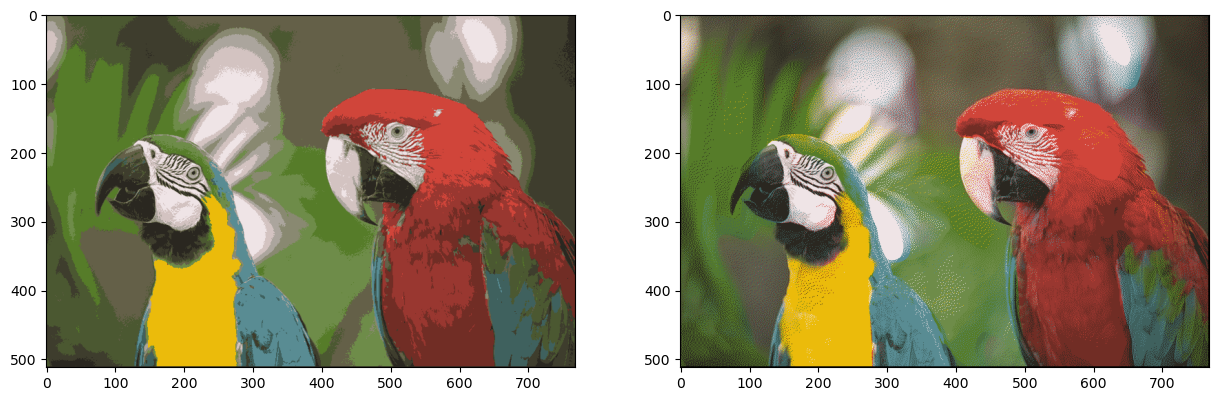

In [41]:
plt.subplot(121), plt.imshow( quantized)  
plt.subplot(122), plt.imshow(dithering)   



In [45]:
diff = img - quantized
avg_quant_error = np.mean(diff)
print('error quantized = ',avg_quant_error)
diff = img - dithering
avg_quant_error = np.mean(diff)
print('error dithering = ',avg_quant_error)

error quantized =  0.5288196
error dithering =  0.7228936


In [ ]:
How does the result look like to you?
Выглядит неплохо. Интересно, что средняя ошибка для quantized меньше, но dithering все равно выглядит
лучше. Средняя ошибка не всегда показатель качества)  
What happens if we use 32 colours?
And what happens if we use 256 colours?
Думаю дальнейшее увеличение палитры сделает применение dithering бесполезным. Проверять не стал - слишком 
много машинного времени это занимает)
